In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Precision WorkStation


No vtk


In [7]:
raw_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane'
thumbnail_nt_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace/'
create_if_not_exists(thumbnail_nt_dir)
thumbnail_chat_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat/'
create_if_not_exists(thumbnail_chat_dir)

'/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat/'

# Rename files

In [15]:
for fn in os.listdir(raw_dir):
    if 'CFP' in fn:
        new_fn = fn.replace('CFP', 'Ntb')
    else:
        new_fn = fn.replace('Alexa Fluor 568', 'Chat')
    print fn, new_fn
    os.rename(os.path.join(raw_dir, fn), os.path.join(raw_dir, new_fn))

Chat_slide1-S1-Alexa Fluor 568.tif Chat_slide1-S1-Chat.tif
Chat_slide1-S1-CFP.tif Chat_slide1-S1-Ntb.tif
Chat_slide1-S2-Alexa Fluor 568.tif Chat_slide1-S2-Chat.tif
Chat_slide1-S2-CFP.tif Chat_slide1-S2-Ntb.tif
Chat_slide1-S3-Alexa Fluor 568.tif Chat_slide1-S3-Chat.tif
Chat_slide1-S3-CFP.tif Chat_slide1-S3-Ntb.tif
Chat_slide10-S1-Alexa Fluor 568.tif Chat_slide10-S1-Chat.tif
Chat_slide10-S1-CFP.tif Chat_slide10-S1-Ntb.tif
Chat_slide10-S2-Alexa Fluor 568.tif Chat_slide10-S2-Chat.tif
Chat_slide10-S2-CFP.tif Chat_slide10-S2-Ntb.tif
Chat_slide10-S3-Alexa Fluor 568.tif Chat_slide10-S3-Chat.tif
Chat_slide10-S3-CFP.tif Chat_slide10-S3-Ntb.tif
Chat_slide11-S1-Alexa Fluor 568.tif Chat_slide11-S1-Chat.tif
Chat_slide11-S1-CFP.tif Chat_slide11-S1-Ntb.tif
Chat_slide2-S3-Alexa Fluor 568.tif Chat_slide2-S3-Chat.tif
Chat_slide2-S3-CFP.tif Chat_slide2-S3-Ntb.tif
Chat_slide20-S1-Alexa Fluor 568.tif Chat_slide20-S1-Chat.tif
Chat_slide20-S1-CFP.tif Chat_slide20-S1-Ntb.tif
Chat_slide20-S2-Alexa Fluor 568.tif

Chat_slide57-S3-Alexa Fluor 568.tif Chat_slide57-S3-Chat.tif
Chat_slide57-S3-CFP.tif Chat_slide57-S3-Ntb.tif
Chat_slide58-S1-Alexa Fluor 568.tif Chat_slide58-S1-Chat.tif
Chat_slide58-S1-CFP.tif Chat_slide58-S1-Ntb.tif
Chat_slide58-S2-Alexa Fluor 568.tif Chat_slide58-S2-Chat.tif
Chat_slide58-S2-CFP.tif Chat_slide58-S2-Ntb.tif
Chat_slide59-S1-Alexa Fluor 568.tif Chat_slide59-S1-Chat.tif
Chat_slide59-S1-CFP.tif Chat_slide59-S1-Ntb.tif
Chat_slide59-S2-Alexa Fluor 568.tif Chat_slide59-S2-Chat.tif
Chat_slide59-S2-CFP.tif Chat_slide59-S2-Ntb.tif
Chat_slide59-S3-Alexa Fluor 568.tif Chat_slide59-S3-Chat.tif
Chat_slide59-S3-CFP.tif Chat_slide59-S3-Ntb.tif
Chat_slide7-S3-CFP.tif Chat_slide7-S3-Ntb.tif
Chat_slide8-S1-Alexa Fluor 568.tif Chat_slide8-S1-Chat.tif
Chat_slide8-S1-CFP.tif Chat_slide8-S1-Ntb.tif
Chat_slide8-S2-Alexa Fluor 568.tif Chat_slide8-S2-Chat.tif
Chat_slide8-S2-CFP.tif Chat_slide8-S2-Ntb.tif
Chat_slide8-S3-Alexa Fluor 568.tif Chat_slide8-S3-Chat.tif
Chat_slide8-S3-CFP.tif Chat_sli

# Generate thumbnails - use Gimp

In [18]:
def identify_shape(img_fp):
    return map(int, check_output("identify -format %%Wx%%H \"%s\"" % img_fp, shell=True).split('x'))

In [23]:
downsample = 32

for fn in os.listdir(raw_dir):
    raw_shape = identify_shape(os.path.join(raw_dir, fn))
    new_width = raw_shape[0] / downsample
    new_height = raw_shape[1] / downsample

    if 'Ntb' in fn: # neurotrace blue
        thumbnail_dir = thumbnail_nt_dir
    else:
        thumbnail_dir = thumbnail_chat_dir
    
    # Remove space because original names contain "Alexa Fluor 568".
    name = os.path.splitext(fn)[0].replace(" ", "")

    cmd = """gimp -i -b '(script-fu-simple-scale "%(raw_dir)s/%(fn)s" %(new_width)d %(new_height)d "%(thumbnail_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
        {'new_width': new_width, 'new_height':new_height, 'fn':fn, 'raw_dir':raw_dir, 'name': name, 'thumbnail_dir': thumbnail_dir}
    execute_command(cmd)

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S1-Chat.tif" 583 872 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S1-Ntb.tif" 583 872 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S2-Chat.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S2-Ntb.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S3-Chat.tif" 583 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S1-Ntb.tif" 642 988 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S2-Chat.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S2-Ntb.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide11-S2-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide11-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide11-S3-Chat.tif" 699 1046 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Ch

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S1-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S2-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S2-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S3-Chat.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S3-Ntb.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S2-Ntb.tif" 700 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S3-Chat.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S3-Ntb.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide23-S1-Chat.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide23-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide23-S1-Ntb.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S2-Ntb.tif" 699 1219 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S3-Chat.tif" 699 1218 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S3-Ntb.tif" 699 1218 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide3-S1-Chat.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide3-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide3-S1-Ntb.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Cha

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S2-Chat.tif" 699 1276 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S2-Ntb.tif" 699 1276 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S3-Chat.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S3-Ntb.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide36-S1-Chat.tif" 699 1219 "/media/yuncong/BstemAtlasData/ChatCryoJa

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S2-Chat.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S2-Ntb.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S3-Chat.tif" 699 1449 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S3-Ntb.tif" 699 1449 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide42-S1-Chat.tif" 756 1392 "/media/yuncong/BstemAtlasData/ChatCryoJa

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide5-S3-Ntb.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide5-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S1-Chat.tif" 758 1507 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S1-Ntb.tif" 758 1507 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S2-Chat.tif" 757 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S2-Ntb.tif" 757 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_C

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S1-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S2-Chat.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S2-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S3-Chat.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S3-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S1-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S1-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S2-Chat.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S2-Ntb.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S3-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//

# Generate thumbnails - use skimage
loading images is very slow.

In [3]:
img = imread('/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide20-S2-CFP.tif')

In [5]:
img_rescaled = rescale(img, scale=0.03125)

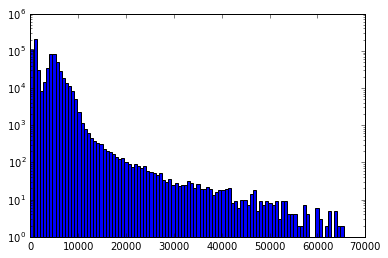

In [14]:
plt.hist(img.flatten(), bins=100, log=True);

In [16]:
metadata_cache['section_limits']['MD590']

array([ 82, 343])

# Rotate

In [ ]:
#! mogrify -rotate 90 -flip -path ChatCryoJane_Chat_rotated ChatCryoJane_Chat/*

In [4]:
raw_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane'
raw_nt_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_raw_Neurotrace/'
create_if_not_exists(raw_nt_dir)
raw_chat_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_raw_Chat/'
create_if_not_exists(raw_chat_dir)

'/media/yuncong/BstemAtlasData/ChatCryoJane_raw_Chat/'

In [ ]:
['Chat_slide42-S1-Ntb.tif',
'Chat_slide42-S3-Ntb.tif',
'Chat_slide43-S3-Ntb.tif',
'Chat_slide44-S2-Ntb.tif',
'Chat_slide45-S2-Ntb.tif',
'Chat_slide45-S3-Ntb.tif',
'Chat_slide46-S1-Ntb.tif',
'Chat_slide46-S2-Ntb.tif',
'Chat_slide46-S3-Ntb.tif',
'Chat_slide47-S1-Ntb.tif',
'Chat_slide47-S2-Ntb.tif',
'Chat_slide47-S3-Ntb.tif',
'Chat_slide48-S1-Ntb.tif',
'Chat_slide48-S2-Ntb.tif',
'Chat_slide48-S3-Ntb.tif',
'Chat_slide49-S1-Ntb.tif',
'Chat_slide49-S2-Ntb.tif',
'Chat_slide49-S3-Ntb.tif',
'Chat_slide50-S1-Ntb.tif',
'Chat_slide50-S2-Ntb.tif',
'Chat_slide50-S3-Ntb.tif',
'Chat_slide51-S1-Ntb.tif',
'Chat_slide51-S2-Ntb.tif',
'Chat_slide51-S3-Ntb.tif']

In [ ]:
# for fn in os.listdir(raw_dir):
for fn in \
['Chat_slide42-S1-Chat.tif',
'Chat_slide42-S3-Chat.tif',
'Chat_slide43-S3-Chat.tif',
'Chat_slide44-S2-Chat.tif',
'Chat_slide45-S2-Chat.tif',
'Chat_slide45-S3-Chat.tif',
'Chat_slide46-S1-Chat.tif',
'Chat_slide46-S2-Chat.tif',
'Chat_slide46-S3-Chat.tif',
'Chat_slide47-S1-Chat.tif',
'Chat_slide47-S2-Chat.tif',
'Chat_slide47-S3-Chat.tif',
'Chat_slide48-S1-Chat.tif',
'Chat_slide48-S2-Chat.tif',
'Chat_slide48-S3-Chat.tif',
'Chat_slide49-S1-Chat.tif',
'Chat_slide49-S2-Chat.tif',
'Chat_slide49-S3-Chat.tif',
'Chat_slide50-S1-Chat.tif',
'Chat_slide50-S2-Chat.tif',
'Chat_slide50-S3-Chat.tif',
'Chat_slide51-S1-Chat.tif',
'Chat_slide51-S2-Chat.tif',
'Chat_slide51-S3-Chat.tif']:

    if 'Ntb' in fn: # neurotrace blue
        raw_rotated_dir = raw_nt_dir
    else: # Chat
        raw_rotated_dir = raw_chat_dir

    # Remove space because original names contain "Alexa Fluor 568".
    name = os.path.splitext(fn)[0].replace(" ", "")

#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(raw_dir)s/%(fn)s" -flip -rotate 270 "%(raw_rotated_dir)s/%(name)s.tif" """ % \
        {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}
    execute_command(cmd)

In [8]:
for fn in os.listdir(thumbnail_nt_dir):
    name = os.path.splitext(fn)[0].replace(" ", "")

#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(raw_dir)s/%(fn)s" -flip -rotate 270 "%(rotated_thumbnail_dir)s/%(name)s.tif" """ % \
        {'fn':fn, 'raw_dir':thumbnail_nt_dir, 'name': name, 'rotated_thumbnail_dir': thumbnail_nt_dir}
    execute_command(cmd)

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide1-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide10-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide10-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide10-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide21-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide21-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide22-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide23-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCry

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide31-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide31-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide32-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide33-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCry

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide44-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide44-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide44-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide44-S3-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide45-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide45-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide45-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide45-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide45-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCry

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide58-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide58-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide58-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide58-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide59-S1-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide59-S1-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide59-S2-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide59-S2-Ntb.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace//Chat_slide59-S3-Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCry

In [9]:
for fn in os.listdir(thumbnail_chat_dir):
    name = os.path.splitext(fn)[0].replace(" ", "")

#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(raw_dir)s/%(fn)s" -flip -rotate 270 "%(rotated_thumbnail_dir)s/%(name)s.tif" """ % \
        {'fn':fn, 'raw_dir':thumbnail_chat_dir, 'name': name, 'rotated_thumbnail_dir': thumbnail_chat_dir}
    execute_command(cmd)

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide1-S3-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide10-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide10-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide10-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide10-S2-Chat.tif" 
c

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide40-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide40-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide44-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide44-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide50-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide50-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide54-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide54-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide60-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide60-S1-Chat.t

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide22-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide22-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide22-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide22-S3-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide23-S3-Chat.t

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide16-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide16-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide16-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide16-S3-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide17-S3-Chat.t

convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S2-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S3-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide57-S3-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide58-S1-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide58-S1-Chat.tif" 
convert "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide58-S2-Chat.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat//Chat_slide58-S2-Chat.t